In [1]:
import ee
import folium
import os

# Initialisation Earth Engine
ee.Initialize()

# Créer le dossier output s'il n'existe pas
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Raster et frontière
raster = ee.Image("projects/formationgee/assets/terres_cultivees_ouguanda")
uganda = ee.FeatureCollection("projects/formationgee/assets/gadm41_UGA_0")

# Créer une carte Folium centrée sur l'Ouganda
m = folium.Map(location=[1.5, 32], zoom_start=7)

# Fonction pour ajouter un raster EE sur Folium
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

# Ajouter la fonction add_ee_layer à Folium
folium.Map.add_ee_layer = add_ee_layer

# Ajouter le raster "Terres cultivées"
m.add_ee_layer(raster, {"min": 0, "max": 1, "palette": ["#f0f0e0", "#407030"]}, "Terres cultivées")

# Ajouter la frontière
folium.GeoJson(
    data=uganda.getInfo(),
    name='Frontière',
    style_function=lambda x: {'color': 'black', 'fillColor': 'transparent', 'weight': 2}
).add_to(m)

# Contrôle des couches
folium.LayerControl().add_to(m)

# Exporter la carte en HTML dans le dossier output
html_path = os.path.join(output_dir, "terres_cultivees_uganda.html")
m.save(html_path)

# Afficher la carte directement dans le notebook
m


In [2]:
import ee
import folium
import os

# Initialisation Earth Engine
ee.Initialize()

# Créer le dossier output s'il n'existe pas
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Charger l’image Hansen
img = ee.Image('UMD/hansen/global_forest_change_2024_v1_12')

# Définir la zone d'intérêt : Ouganda
countries = ee.FeatureCollection('FAO/GAUL/2015/level0')
uganda = countries.filter(ee.Filter.eq('ADM0_NAME', 'Uganda'))

# Paramètres de visualisation pour la forêt 2000
vis_params = {
    'bands': ['treecover2000'],
    'min': 0,
    'max': 100,
    'palette': ['beige', 'green']
}

# Créer une carte Folium centrée sur l’Ouganda
m = folium.Map(location=[1.3733, 32.2903], zoom_start=6)

# Ajouter le raster Hansen
mapid = img.clip(uganda).getMapId(vis_params)
folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Google Earth Engine',
    overlay=True,
    name='Forest cover 2000 (Uganda)'
).add_to(m)

# Ajouter la frontière
folium.GeoJson(
    data=uganda.getInfo(),
    name='Frontière',
    style_function=lambda x: {'color': 'black', 'fillColor': 'transparent','weight':2}
).add_to(m)

# Ajouter contrôle des couches
folium.LayerControl().add_to(m)

# 🔹 Légende dégradée (barre beige → vert)
legend_html = '''
<div style="
    position: fixed; 
    bottom: 50px; left: 50px; width: 200px; height: 40px; 
    border:2px solid grey; z-index:9999; font-size:12px;
    background-color:white; padding: 5px;">
    <b>Couverture forestière (%)</b><br>
    <div style="width: 100%; height: 15px; 
                background: linear-gradient(to right, beige, green); 
                margin-top:5px;"></div>
    <div style="display:flex; justify-content: space-between;">
        <span>0%</span>
        <span>100%</span>
    </div>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# 🔹 Exporter la carte HTML dans le dossier output
html_path = os.path.join(output_dir, "forest_cover_2000_uganda.html")
m.save(html_path)

# Afficher la carte
m


In [3]:
import ee
import folium
import os

# Initialisation EE
ee.Initialize()

# Créer le dossier output s'il n'existe pas
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Données
h = ee.Image('UMD/hansen/global_forest_change_2024_v1_12')
u = ee.FeatureCollection('FAO/GAUL/2015/level0').filter(ee.Filter.eq('ADM0_NAME', 'Uganda'))
i = h.clip(u)

# Couches
non_forest = i.select('treecover2000').lt(20).selfMask()       # <20%
forest = i.select('treecover2000').gte(20).selfMask()          # ≥20%
deforest = i.select('lossyear').gte(1).And(i.select('lossyear').lte(22))
gain = i.select('gain').selfMask()                             # Gain 2000-2012

# Carte Folium
m = folium.Map(location=[1.37, 32.29], zoom_start=7)

# Ajout des couches
for (layer, color, name) in [
    (non_forest, 'beige', 'Non-forêt 2000 (<20%)'),
    (forest, '006400', 'Forêt 2000'),
    (deforest, 'ff0000', 'Déforestation 2000-2022'),
    (gain, '00ff00', 'Gain forestier 2000-2012')
]:
    folium.TileLayer(
        tiles=layer.getMapId({'palette': [color]})['tile_fetcher'].url_format,
        name=name,
        attr='GEE',
        overlay=True
    ).add_to(m)

# Frontière
folium.TileLayer(
    tiles=u.style(**{'color': 'black', 'fillColor': '00000000'}).getMapId()['tile_fetcher'].url_format,
    name='Frontière Ouganda',
    attr='GEE',
    overlay=True
).add_to(m)

# Contrôle des couches
folium.LayerControl().add_to(m)

# 🔹 Export HTML dans le dossier output
html_path = os.path.join(output_dir, "forest_layers_uganda.html")
m.save(html_path)

# Afficher la carte
m


In [4]:
import ee
import folium
import os

# Initialisation Earth Engine
ee.Initialize()

# Créer le dossier output s'il n'existe pas
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# 1️⃣ Charger le raster GISA (imperméable)
gisa = ee.Image("projects/sat-io/open-datasets/GISA_1972_2021")

# 2️⃣ Charger Ouganda depuis GADM
uganda = ee.FeatureCollection("FAO/GAUL/2015/level0") \
            .filter(ee.Filter.eq('ADM0_NAME', 'Uganda'))

# 3️⃣ Créer un raster binaire : 1 = imperméable, 0 = perméable
impermeable = gisa.gt(0)  # tous les pixels >0 sont imperméables

# 4️⃣ Raster limité à l'Ouganda
raster_inside = ee.Image(0).where(impermeable.eq(1), 1).clip(uganda)

# 5️⃣ Visualisation avec palette blanc/rouge
raster_rgb = raster_inside.visualize(min=0, max=1, palette=["beige", "#8B4513"])

# 6️⃣ Créer une carte Folium centrée sur l’Ouganda
m = folium.Map(location=[1.5, 32], zoom_start=7)

# Fonction pour ajouter un raster EE sur Folium
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

# Ajouter la fonction add_ee_layer à Folium
folium.Map.add_ee_layer = add_ee_layer

# 7️⃣ Ajouter le raster imperméable
m.add_ee_layer(raster_rgb, {}, "Terres imperméables")

# 8️⃣ Ajouter la frontière
folium.GeoJson(
    data=uganda.getInfo(),
    name='Frontière',
    style_function=lambda x: {'color': 'black', 'fillColor': 'transparent', 'weight': 2}
).add_to(m)

# Contrôle des couches
folium.LayerControl().add_to(m)

# 9️⃣ Exporter la carte HTML dans le dossier output
html_path = os.path.join(output_dir, "terres_impermeables_uganda.html")
m.save(html_path)

# Afficher la carte
m


In [5]:
import ee
import folium
import os

# Initialisation Earth Engine
ee.Initialize()

# Créer le dossier output s'il n'existe pas
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# 1️⃣ Charger le MNT SRTM
dem = ee.Image("USGS/SRTMGL1_003")

# 2️⃣ Calculer la pente en degrés
slope = ee.Terrain.slope(dem)

# 3️⃣ Créer un raster binaire : 1 = pente >= 15%, 0 = pente < 15%
steep_areas = slope.gte(15)

# 4️⃣ Charger l’Ouganda
uganda = ee.FeatureCollection("FAO/GAUL/2015/level0") \
            .filter(ee.Filter.eq('ADM0_NAME', 'Uganda'))

# 5️⃣ Limiter le raster à l’Ouganda
steep_uganda = ee.Image(0).where(steep_areas.eq(1), 1).clip(uganda)

# 6️⃣ Visualiser avec palette blanc / orange
steep_rgb = steep_uganda.visualize(min=0, max=1, palette=["white", "#FFA500"])

# 7️⃣ Créer la carte Folium centrée sur l’Ouganda
m = folium.Map(location=[1.5, 32], zoom_start=7)

# Fonction pour ajouter un raster EE sur Folium
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

# Ajouter la fonction à Folium
folium.Map.add_ee_layer = add_ee_layer

# 8️⃣ Ajouter le raster des pentes
m.add_ee_layer(steep_rgb, {}, "Pentes >= 15%")

# 9️⃣ Ajouter la frontière
folium.GeoJson(
    data=uganda.getInfo(),
    name='Frontière',
    style_function=lambda x: {'color': 'black', 'fillColor': 'transparent', 'weight': 2}
).add_to(m)

# 10️⃣ Contrôle des couches
folium.LayerControl().add_to(m)

# 11️⃣ Exporter la carte HTML dans le dossier output
html_path = os.path.join(output_dir, "pentes_uganda.html")
m.save(html_path)

# Afficher la carte
m


In [6]:
import ee
import folium
import os

# Initialisation Earth Engine
ee.Initialize()

# Créer le dossier output s'il n'existe pas
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# 1️⃣ Charger l'Ouganda
uganda = ee.FeatureCollection("FAO/GAUL/2015/level0") \
            .filter(ee.Filter.eq('ADM0_NAME', 'Uganda'))

# 2️⃣ Charger le raster des eaux permanentes (occurrence d'eau)
water = ee.Image("JRC/GSW1_3/GlobalSurfaceWater").select("occurrence")

# 3️⃣ Créer un raster binaire : 1 = eau permanente (>=90% occurrence), 0 = non eau
permanent_water = water.gte(90)

# 4️⃣ Limiter à l’Ouganda
water_uganda = ee.Image(0).where(permanent_water.eq(1), 1).clip(uganda)

# 5️⃣ Visualiser avec palette blanc/bleu
water_rgb = water_uganda.visualize(min=0, max=1, palette=["white", "blue"])

# 6️⃣ Créer la carte Folium centrée sur l’Ouganda
m = folium.Map(location=[1.5, 32], zoom_start=7)

# Fonction pour ajouter un raster EE sur Folium
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

# Ajouter la fonction à Folium
folium.Map.add_ee_layer = add_ee_layer

# 7️⃣ Ajouter le raster des eaux permanentes
m.add_ee_layer(water_rgb, {}, "Eaux permanentes")

# 8️⃣ Ajouter la frontière
folium.GeoJson(
    data=uganda.getInfo(),
    name='Frontière',
    style_function=lambda x: {'color': 'black', 'fillColor': 'transparent', 'weight': 2}
).add_to(m)

# Contrôle des couches
folium.LayerControl().add_to(m)

# 9️⃣ Exporter la carte HTML dans le dossier output
html_path = os.path.join(output_dir, "eaux_permanentes_uganda.html")
m.save(html_path)

# Afficher la carte
m


C:\Users\HP\anaconda3\Lib\site-packages\ee\deprecation.py:215: DeprecationWarning: 

Attention required for JRC/GSW1_3/GlobalSurfaceWater! You are using a deprecated asset.
To make sure your code keeps working, please update it.
This dataset has been superseded by JRC/GSW1_4/GlobalSurfaceWater

Learn more: https://developers.google.com/earth-engine/datasets/catalog/JRC_GSW1_3_GlobalSurfaceWater

  warnings.warn(warning, category=DeprecationWarning)


In [7]:
import ee
import folium
import os

ee.Initialize()
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# 1️⃣ Ouganda
uganda = ee.FeatureCollection("FAO/GAUL/2015/level0") \
            .filter(ee.Filter.eq('ADM0_NAME', 'Uganda'))

# 2️⃣ Surfaces protégées
reserves = ee.FeatureCollection("WCMC/WDPA/current/polygons")
reserves_uganda = reserves.filterBounds(uganda)

# Intersection avec l'Ouganda pour limiter les polygones
reserves_uganda_clipped = reserves_uganda.map(lambda f: f.intersection(uganda.geometry(), 1))

# 3️⃣ Carte
m = folium.Map(location=[1.5, 32], zoom_start=7)

# Fond blanc : polygone de l'Ouganda
folium.GeoJson(
    data=uganda.getInfo(),
    name='Fond Ouganda',
    style_function=lambda x: {'color': 'black', 'fillColor': 'white', 'weight': 1, 'fillOpacity': 1}
).add_to(m)

# Surfaces protégées
folium.GeoJson(
    data=reserves_uganda_clipped.getInfo(),
    name='Surfaces protégées',
    style_function=lambda x: {'color': 'green', 'fillColor': 'green', 'weight': 1, 'fillOpacity': 0.5}
).add_to(m)

# Contrôle des couches
folium.LayerControl().add_to(m)

# Export
html_path = os.path.join(output_dir, "surfaces_protegees_uganda.html")
m.save(html_path)
m


In [8]:
import ee
import folium
import os

# Initialisation Earth Engine
ee.Initialize()

# Créer le dossier output s'il n'existe pas
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Charger l’Ouganda
uganda = ee.FeatureCollection("FAO/GAUL/2015/level0") \
            .filter(ee.Filter.eq('ADM0_NAME', 'Uganda'))

# -----------------------------
# 1️⃣ Charger les rasters
# -----------------------------
cultivees = ee.Image("projects/formationgee/assets/terres_cultivees_ouguanda").unmask(0).clip(uganda)
hansen = ee.Image('UMD/hansen/global_forest_change_2024_v1_12')
lossyear = hansen.select('lossyear')
deboisees = lossyear.gte(1).And(lossyear.lte(22)).unmask(0).clip(uganda)
gisa = ee.Image("projects/sat-io/open-datasets/GISA_1972_2021")
impermeable = gisa.gt(0).unmask(0).clip(uganda)
dem = ee.Image("USGS/SRTMGL1_003")
slope = ee.Terrain.slope(dem)
pentes = slope.gte(15).unmask(0).clip(uganda)
water = ee.Image("JRC/GSW1_3/GlobalSurfaceWater").select("occurrence")
eaux = water.gte(90).unmask(0).clip(uganda)
reserves = ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(uganda)
protegees = ee.Image(0).paint(reserves, 1).unmask(0).clip(uganda)

# -----------------------------
# 2️⃣ Créer la carte Folium
# -----------------------------
m = folium.Map(location=[1.5, 32], zoom_start=7)

# Fonction pour ajouter un raster EE sur Folium
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

folium.Map.add_ee_layer = add_ee_layer

# -----------------------------
# 3️⃣ Ajouter les couches progressivement
# -----------------------------
m.add_ee_layer(cultivees.visualize(min=0, max=1, palette=["white", "green"]), {}, "Terres cultivées")
m.add_ee_layer(deboisees.visualize(min=0, max=1, palette=["white", "red"]), {}, "Terres déboisées 2000-2022")
m.add_ee_layer(impermeable.visualize(min=0, max=1, palette=["white", "orange"]), {}, "Terres imperméables")
m.add_ee_layer(pentes.visualize(min=0, max=1, palette=["white", "brown"]), {}, "Pentes >=15%")
m.add_ee_layer(eaux.visualize(min=0, max=1, palette=["white", "blue"]), {}, "Eaux permanentes")
m.add_ee_layer(protegees.visualize(min=0, max=1, palette=["white", "darkgreen"]), {}, "Surfaces protégées")

# -----------------------------
# 4️⃣ Ajouter la frontière
# -----------------------------
folium.GeoJson(
    data=uganda.getInfo(),
    name='Frontière',
    style_function=lambda x: {'color': 'black', 'fillColor': 'transparent', 'weight': 2}
).add_to(m)

# -----------------------------
# 5️⃣ Ajouter le contrôle des couches
# -----------------------------
folium.LayerControl().add_to(m)

# -----------------------------
# 6️⃣ Export HTML
# -----------------------------
html_path = os.path.join(output_dir, "toutes_les_couches_uganda.html")
m.save(html_path)

# -----------------------------
# 7️⃣ Afficher la carte
# -----------------------------
m


In [9]:
import ee
import folium
import os

# -----------------------------
# 0️⃣ Initialisation
# -----------------------------
ee.Initialize()
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# -----------------------------
# 1️⃣ Charger l’Ouganda
# -----------------------------
uganda = ee.FeatureCollection("FAO/GAUL/2015/level0") \
            .filter(ee.Filter.eq('ADM0_NAME', 'Uganda'))

# -----------------------------
# 2️⃣ Charger les données
# -----------------------------

# Terres cultivées
cultivees = ee.Image("projects/formationgee/assets/terres_cultivees_ouguanda").unmask(0).clip(uganda)
cultivees_bin = cultivees.gt(0)

# Déforestation
hansen = ee.Image('UMD/hansen/global_forest_change_2024_v1_12')
lossyear = hansen.select('lossyear')
deboisees = lossyear.gte(1).And(lossyear.lte(22)).unmask(0).clip(uganda)
deboisees_bin = deboisees.gt(0)
# Réaligner la couche déboisée sur la grille des cultivées
deboisees_aligned = deboisees_bin.reproject(
    crs=cultivees.projection(),
    scale=cultivees.projection().nominalScale()
)

# Terres imperméables
gisa = ee.Image("projects/sat-io/open-datasets/GISA_1972_2021").gt(0).unmask(0).clip(uganda)

# Eaux permanentes
water = ee.Image("JRC/GSW1_3/GlobalSurfaceWater").select("occurrence").gte(90).unmask(0).clip(uganda)

# Pentes >=15%
dem = ee.Image("USGS/SRTMGL1_003")
slope = ee.Terrain.slope(dem)
pentes = slope.gte(15).unmask(0).clip(uganda)

# Surfaces protégées
reserves = ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(uganda)
protegees = ee.Image(0).paint(reserves, 1).unmask(0).clip(uganda)

# -----------------------------
# 3️⃣ Créer la carte Folium
# -----------------------------
m = folium.Map(location=[1.5, 32], zoom_start=7)

def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

folium.Map.add_ee_layer = add_ee_layer

# -----------------------------
# 4️⃣ Étapes progressives
# -----------------------------

# 1️⃣ Frontière
folium.GeoJson(
    data=uganda.getInfo(),
    name='Frontière',
    style_function=lambda x: {'color': 'black', 'fillColor': 'transparent', 'weight': 2}
).add_to(m)

# 2️⃣ Terres cultivées
m.add_ee_layer(
    cultivees_bin.visualize(min=0, max=1, palette=["#FFFFE0", "#006400"]),
    {},
    "Terres cultivées"
)

# 3️⃣ Cultivées + Déboisées
cultivees_deboisees = cultivees_bin.Or(deboisees_aligned)
m.add_ee_layer(
    cultivees_deboisees.visualize(min=0, max=1, palette=["#FFFFE0", "#013220"]),
    {},
    "Cultivées + Déboisées"
)

# 4️⃣ Exclure terres imperméables
step4 = cultivees_deboisees.updateMask(gisa.eq(0))
m.add_ee_layer(
    step4.visualize(min=0, max=1, palette=["#FFFFE0", "#228B22"]),
    {},
    "Sans imperméables"
)

# 5️⃣ Exclure eaux permanentes
step5 = step4.updateMask(water.eq(0))
m.add_ee_layer(
    step5.visualize(min=0, max=1, palette=["#FFFFE0", "#CCFFCC"]),
    {},
    "Sans eaux permanentes"
)

# 6️⃣ Exclure pentes >=15%
step6 = step5.updateMask(pentes.eq(0))
m.add_ee_layer(
    step6.visualize(min=0, max=1, palette=["#FFFFE0", "#CCFFCC"]),
    {},
    "Sans pentes >=15%"
)

# 7️⃣ Exclure surfaces protégées → Terres arables finales
terres_arables = step6.updateMask(protegees.eq(0))
m.add_ee_layer(
    terres_arables.visualize(min=0, max=1, palette=["#FFFFE0", "#FFD700"]),
    {},
    "Terres arables finales(exclusion des zones protgées)"
)

# -----------------------------
# 5️⃣ Contrôle des couches
# -----------------------------
folium.LayerControl().add_to(m)

# -----------------------------
# 6️⃣ Export HTML
# -----------------------------
html_path = os.path.join(output_dir, "terres_arables_ouguanda.html")
m.save(html_path)

# -----------------------------
# 7️⃣ Affichage
# -----------------------------
m


  Terres cultivées: 9,791,815 ha
  Terres déboisées: 1,211,574 ha
  Terres imperméables: 746,778 ha
  Eaux permanentes: 3,513,921 ha
  Surfaces protégées: 3,588,815 ha
  Terres pentues (>15%): 84,721 ha
  Union cultivées+déboisées: 10,244,243 ha
  Terres arables (corrigé): 9,154,284 ha
  Superficie totale Ouganda: 24,147,285 ha


C:\Users\HP\AppData\Local\Temp\ipykernel_35236\1357739305.py:155: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(categories_all, rotation=45, ha='right', fontsize=10)


  image: 9,697,668 ha
  image: 9,641,651 ha
  image: 9,162,528 ha


C:\Users\HP\AppData\Local\Temp\ipykernel_35236\1357739305.py:196: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(categories_process, rotation=45, ha='right', fontsize=10)


<Figure size 1600x1000 with 0 Axes>

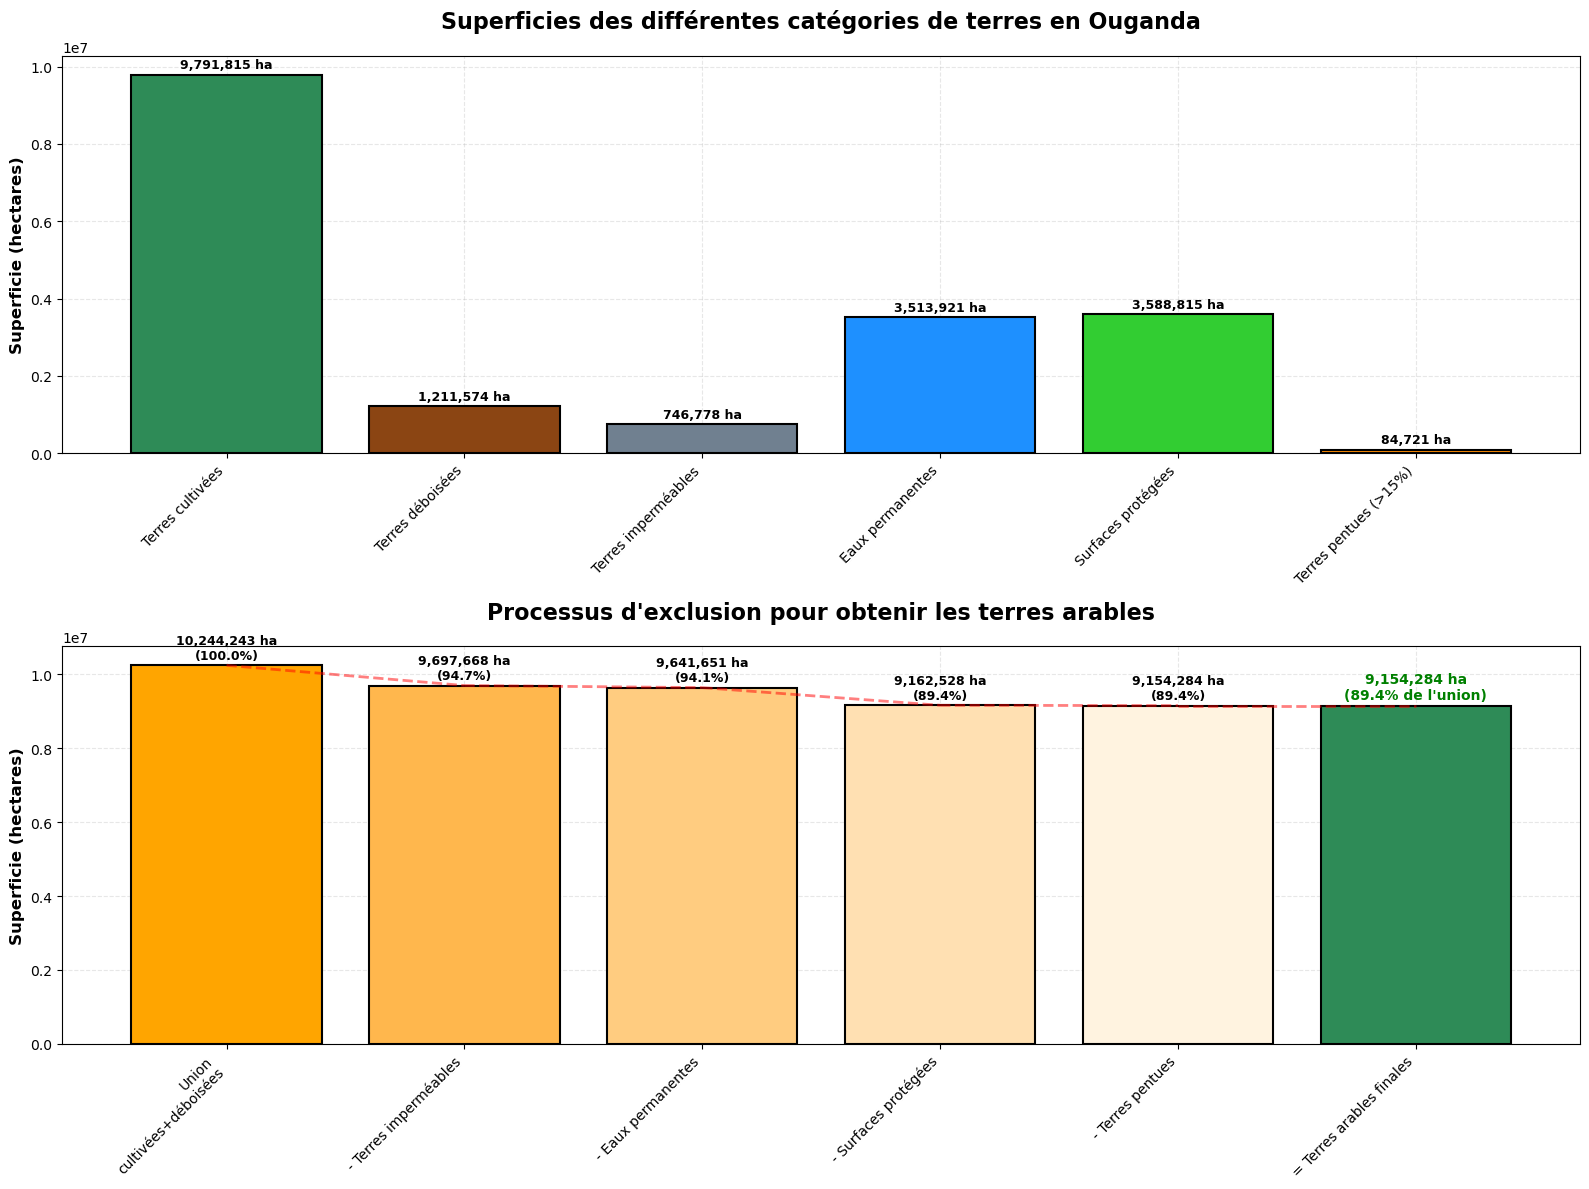


TABLEAU RÉCAPITULATIF DES SUPERFICIES
Catégorie                           Superficie (ha)      % du total
----------------------------------------------------------------------
Terres cultivées                          9,791,815           40.6%
Terres déboisées                          1,211,574            5.0%
Terres imperméables                         746,778            3.1%
Eaux permanentes                          3,513,921           14.6%
Surfaces protégées                        3,588,815           14.9%
Terres pentues (>15%)                        84,721            0.4%
Union (cultivées+déboisées)              10,244,243           42.4%
Terres arables finales                    9,154,284           37.9%
  Superficie totale de l'Ouganda: 24,147,285 ha
  Union terres cultivées+déboisées: 10,244,243 ha (42.4% du total)
  Terres arables disponibles: 9,154,284 ha (37.9% du total)
  Taux de disponibilité: 89.4% de l'union


In [10]:
import ee
import folium
import os
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 0️⃣ Initialisation
# -----------------------------
ee.Initialize()
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# -----------------------------
# 1️⃣ Charger l'Ouganda
# -----------------------------
uganda = ee.FeatureCollection("FAO/GAUL/2015/level0") \
            .filter(ee.Filter.eq('ADM0_NAME', 'Uganda'))

# -----------------------------
# 2️⃣ Charger les données
# -----------------------------

# Terres cultivées
cultivees = ee.Image("projects/formationgee/assets/terres_cultivees_ouguanda").unmask(0).clip(uganda)
cultivees_bin = cultivees.gt(0)

# Déforestation
hansen = ee.Image('UMD/hansen/global_forest_change_2024_v1_12')
lossyear = hansen.select('lossyear')
deboisees = lossyear.gte(1).And(lossyear.lte(22)).unmask(0).clip(uganda)
deboisees_bin = deboisees.gt(0)
# Réaligner la couche déboisée sur la grille des cultivées
deboisees_bin = deboisees_bin.reproject(
    crs=cultivees.projection(),
    scale=cultivees.projection().nominalScale()
)

# Terres imperméables
gisa = ee.Image("projects/sat-io/open-datasets/GISA_1972_2021").gt(0).unmask(0).clip(uganda)

# Eaux permanentes
water = ee.Image("JRC/GSW1_3/GlobalSurfaceWater").select("occurrence").gte(90).unmask(0).clip(uganda)

# Surfaces protégées
reserves = ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(uganda)
protegees = ee.Image(0).paint(reserves, 1).unmask(0).clip(uganda)

# Terres pentues (exemple: pentes > 15%)
dem = ee.Image("USGS/SRTMGL1_003").clip(uganda)
slope = ee.Terrain.slope(dem)
pentues = slope.gt(15).unmask(0)

# -----------------------------
# 3️⃣ Correction: Calcul cohérent des terres arables
# -----------------------------


# 1. UNION des terres cultivées et déboisées
union_cult_debois = cultivees_bin.Or(deboisees_bin)

# 2. Masquer les zones EXCLUSES 
terres_arables_corrigees = union_cult_debois \
    .updateMask(gisa.eq(0)) \
    .updateMask(water.eq(0)) \
    .updateMask(protegees.eq(0)) \
    .updateMask(pentues.eq(0))

# -----------------------------
# 4️⃣ Calcul des superficies (en hectares) 
# -----------------------------

def calculate_area(image, scale=1000, name="image"):
    """Calcule la superficie en hectares d'une image binaire"""
    # Surface d'un pixel en hectares
    pixel_area = ee.Image.pixelArea().divide(10000)
    
    # Superficie totale de la catégorie
    area_image = image.multiply(pixel_area)
    
    # Somme sur toute la région
    stats = area_image.reduceRegion(
        reducer=ee.Reducer.sum(),
        geometry=uganda.geometry(),
        scale=scale,
        maxPixels=1e13
    )
    
    area_value = stats.getNumber(image.bandNames().get(0))
    print(f"  {name}: {area_value.getInfo():,.0f} ha")
    return area_value

# Calcul des superficies pour chaque catégorie

# Catégories individuelles
cultivees_area = calculate_area(cultivees_bin, name="Terres cultivées")
deboisees_area = calculate_area(deboisees_bin, name="Terres déboisées")
impermeables_area = calculate_area(gisa, name="Terres imperméables")
eaux_area = calculate_area(water, name="Eaux permanentes")
protegees_area = calculate_area(protegees, name="Surfaces protégées")
pentues_area = calculate_area(pentues, name="Terres pentues (>15%)")

# Union des terres cultivées et déboisées
union_area = calculate_area(union_cult_debois, name="Union cultivées+déboisées")

# Terres arables corrigées
arables_area = calculate_area(terres_arables_corrigees, name="Terres arables (corrigé)")

# Superficie totale de l'Ouganda (pour référence)
uganda_area_ha = calculate_area(ee.Image.constant(1).clip(uganda), name="Superficie totale Ouganda")


# -----------------------------
# 5️⃣ Préparation des données pour le graphique
# -----------------------------

# Récupération des valeurs
areas_dict = {
    'Terres cultivées': cultivees_area.getInfo(),
    'Terres déboisées': deboisees_area.getInfo(),
    'Terres imperméables': impermeables_area.getInfo(),
    'Eaux permanentes': eaux_area.getInfo(),
    'Surfaces protégées': protegees_area.getInfo(),
    'Terres pentues (>15%)': pentues_area.getInfo(),
    'Union (cultivées+déboisées)': union_area.getInfo(),
    'Terres arables finales': arables_area.getInfo()
}

# -----------------------------
# 6️⃣ Création du graphique en tuyaux d'orgue
# -----------------------------

plt.figure(figsize=(16, 10))

# Création des sous-graphiques
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Graphique 1: Toutes les catégories
categories_all = list(areas_dict.keys())[:-2]  # Exclure union et arables
superficies_all = list(areas_dict.values())[:-2]
colors_all = ['#2E8B57', '#8B4513', '#708090', '#1E90FF', '#32CD32', '#FF8C00']

bars1 = ax1.bar(categories_all, superficies_all, color=colors_all, edgecolor='black', linewidth=1.5)

# Ajout des valeurs sur les barres
for bar, superficie in zip(bars1, superficies_all):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(superficies_all)*0.01,
             f'{superficie:,.0f} ha',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

ax1.set_title('Superficies des différentes catégories de terres en Ouganda', 
              fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('Superficie (hectares)', fontsize=12, fontweight='bold')
ax1.set_xticklabels(categories_all, rotation=45, ha='right', fontsize=10)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

# Graphique 2: Focus sur le processus d'exclusion
categories_process = ['Union\ncultivées+déboisées', 
                     '- Terres imperméables',
                     '- Eaux permanentes', 
                     '- Surfaces protégées',
                     '- Terres pentues',
                     '= Terres arables finales']

# Calcul des superficies intermédiaires pour visualiser le processus
step1_area = union_area.getInfo()
step2_area = calculate_area(union_cult_debois.updateMask(gisa.eq(0))).getInfo()
step3_area = calculate_area(union_cult_debois.updateMask(gisa.eq(0)).updateMask(water.eq(0))).getInfo()
step4_area = calculate_area(union_cult_debois.updateMask(gisa.eq(0)).updateMask(water.eq(0)).updateMask(protegees.eq(0))).getInfo()
step5_area = arables_area.getInfo()

superficies_process = [step1_area, step2_area, step3_area, step4_area, step5_area, step5_area]
colors_process = ['#FFA500', '#FFB74D', '#FFCC80', '#FFE0B2', '#FFF3E0', '#2E8B57']

bars2 = ax2.bar(categories_process, superficies_process, color=colors_process, 
                edgecolor='black', linewidth=1.5)

# Ajout des valeurs et des pourcentages
for i, (bar, superficie) in enumerate(zip(bars2, superficies_process)):
    height = bar.get_height()
    if i < len(superficies_process) - 1:
        pourcentage = (superficie / step1_area * 100) if step1_area > 0 else 0
        ax2.text(bar.get_x() + bar.get_width()/2., height + step1_area*0.01,
                 f'{superficie:,.0f} ha\n({pourcentage:.1f}%)',
                 ha='center', va='bottom', fontsize=9, fontweight='bold')
    else:
        ax2.text(bar.get_x() + bar.get_width()/2., height + step1_area*0.01,
                 f'{superficie:,.0f} ha\n({superficie/step1_area*100:.1f}% de l\'union)',
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='green')

ax2.set_title('Processus d\'exclusion pour obtenir les terres arables', 
              fontsize=16, fontweight='bold', pad=20)
ax2.set_ylabel('Superficie (hectares)', fontsize=12, fontweight='bold')
ax2.set_xticklabels(categories_process, rotation=45, ha='right', fontsize=10)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)

# Ajout d'une ligne pour montrer la réduction progressive
for i in range(len(superficies_process)-1):
    ax2.plot([i, i+1], [superficies_process[i], superficies_process[i+1]], 
             'r--', alpha=0.5, linewidth=2)

plt.tight_layout()

# Sauvegarde du graphique
graph_path = os.path.join(output_dir, "superficies_terres_ouganda.png")
plt.savefig(graph_path, dpi=300, bbox_inches='tight')

# Affichage du graphique
plt.show()

# -----------------------------
# 7️⃣ Tableau récapitulatif
# -----------------------------

print("\n" + "="*70)
print("TABLEAU RÉCAPITULATIF DES SUPERFICIES")
print("="*70)
print(f"{'Catégorie':<30} {'Superficie (ha)':>20} {'% du total':>15}")
print("-"*70)

for categorie, superficie in areas_dict.items():
    pourcentage_total = (superficie / uganda_area_ha.getInfo() * 100) if uganda_area_ha.getInfo() > 0 else 0
    print(f"{categorie:<30} {superficie:>20,.0f} {pourcentage_total:>14.1f}%")

print("="*70)

print(f"  Superficie totale de l'Ouganda: {uganda_area_ha.getInfo():,.0f} ha")
print(f"  Union terres cultivées+déboisées: {union_area.getInfo():,.0f} ha ({union_area.getInfo()/uganda_area_ha.getInfo()*100:.1f}% du total)")
print(f"  Terres arables disponibles: {arables_area.getInfo():,.0f} ha ({arables_area.getInfo()/uganda_area_ha.getInfo()*100:.1f}% du total)")
print(f"  Taux de disponibilité: {arables_area.getInfo()/union_area.getInfo()*100:.1f}% de l'union")



  image: 8,811,203 ha


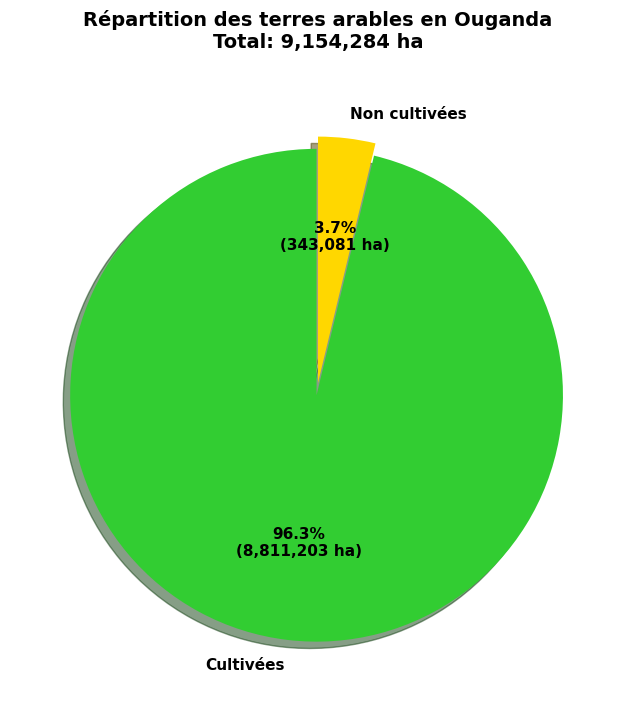

Terres arables cultivées: 8,811,203 ha
Terres arables non cultivées: 343,081 ha
Total terres arables: 9,154,284 ha


In [11]:
# -----------------------------
# Camembert pour terres arables
# -----------------------------

# Calcul des terres arables cultivées (intersection)
cultivees_arables = terres_arables_corrigees.And(cultivees_bin)

# Calcul des superficies
cultivees_arables_area = calculate_area(cultivees_arables).getInfo()
non_cultivees_arables = arables_area.getInfo() - cultivees_arables_area

# Préparation des données
labels = ['Cultivées', 'Non cultivées']
sizes = [cultivees_arables_area, non_cultivees_arables]
colors = ['#32CD32', '#FFD700']
explode = (0.05, 0)

# Création du camembert
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({p*sum(sizes)/100:,.0f} ha)', 
        startangle=90, colors=colors, explode=explode, shadow=True,
        textprops={'fontsize': 11, 'fontweight': 'bold'})
plt.title('Répartition des terres arables en Ouganda\n' +
          f'Total: {sum(sizes):,.0f} ha', 
          fontsize=14, fontweight='bold', pad=20)

# Export
pie_path = os.path.join(output_dir, "camembert_terres_arables.png")
plt.savefig(pie_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Terres arables cultivées: {cultivees_arables_area:,.0f} ha")
print(f"Terres arables non cultivées: {non_cultivees_arables:,.0f} ha")
print(f"Total terres arables: {sum(sizes):,.0f} ha")


In [12]:
import ee
import os
import pandas as pd

# -----------------------------
# 0️⃣ Initialisation
# -----------------------------
ee.Initialize()
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# -----------------------------
# 1️⃣ Charger les données administratives (niveau 1)
# -----------------------------
uganda = ee.FeatureCollection("FAO/GAUL/2015/level0") \
            .filter(ee.Filter.eq('ADM0_NAME', 'Uganda'))

regions = ee.FeatureCollection("FAO/GAUL/2015/level1") \
               .filter(ee.Filter.eq('ADM0_NAME', 'Uganda'))

# -----------------------------
# 2️⃣ Définir les 4 grandes régions avec leurs provinces (ADM1_NAME)
# -----------------------------
regions_principales = {
    "Nord": ['Abim', 'Adjumani', 'Agago', 'Alebtong', 'Amolatar', 'Amuru', 'Apac', 'Arua', 
             'Dokolo', 'Kaabong', 'Kitgum', 'Kotido', 'Lamwo', 'Lira', 'Moroto', 'Nakapiripirit', 
             'Napak', 'Nwoya', 'Otuke', 'Pader', 'Yumbe', 'Zombo', 'Oyam'],
    "Centre": ['Bukomansimbi', 'Butambala', 'Buvuma', 'Buikwe', 'Gomba', 'Kalungu', 'Kampala', 
               'Kayunga', 'Kiboga', 'Kyankwanzi', 'Luwero', 'Lwengo', 'Lyantonde', 'Masaka', 
               'Mityana', 'Mpigi', 'Mubende', 'Mukono', 'Nakasongola', 'Nakaseke', 'Rakai', 
               'Ssembabule', 'Wakiso'],
    "Est": ['Budaka', 'Bududa', 'Bukedea', 'Bukwa', 'Bulambuli', 'Busia', 'Butaleja', 'Iganga', 
            'Jinja', 'Kamuli', 'Kapchorwa', 'Katakwi', 'Kaliro', 'Kibuku', 'Kumi', 'Luuka', 
            'Manafwa', 'Mbale', 'Namayingo', 'Ngora', 'Pallisa', 'Serere', 'Sironko', 'Soroti', 
            'Tororo', 'Mayuge', 'Kween'],
    "Ouest": ['Bundibugyo', 'Bushenyi', 'Hoima', 'Ibanda', 'Isingiro', 'Kabale', 'Kalangala', 
              'Kabarole', 'Kasese', 'Kibaale', 'Kiruhura', 'Kisoro', 'Koboko', 'Mbarara', 
              'Mitooma', 'Moyo', 'Ntungamo', 'Rukungiri', 'Rubirizi', 'Kamwenge', 'Kanungu', 
              'Sheema', 'Buhweju', 'Ntoroko', 'Kyegegwa', 'Kyenjojo']
}

# -----------------------------
# 3️⃣ Charger les données de base (exemple terres arables)
# -----------------------------
cultivees = ee.Image("projects/formationgee/assets/terres_cultivees_ouguanda").unmask(0).clip(uganda)
cultivees_bin = cultivees.gt(0)

# Déforestation 2000-2022
hansen = ee.Image('UMD/hansen/global_forest_change_2024_v1_12')
lossyear = hansen.select('lossyear')
deboisees_bin = lossyear.gte(1).And(lossyear.lte(22)).unmask(0).clip(uganda)

# Réaligner la couche déboisée sur la grille des cultivées
deboisees_bin = deboisees_bin.reproject(
    crs=cultivees.projection(),
    scale=cultivees.projection().nominalScale()
)

# Autres masques (exemple)
gisa = ee.Image("projects/sat-io/open-datasets/GISA_1972_2021").gt(0).unmask(0).clip(uganda)
water = ee.Image("JRC/GSW1_3/GlobalSurfaceWater").select("occurrence").gte(90).unmask(0).clip(uganda)
reserves = ee.FeatureCollection("WCMC/WDPA/current/polygons").filterBounds(uganda)
protegees = ee.Image(0).paint(reserves, 1).unmask(0).clip(uganda)
dem = ee.Image("USGS/SRTMGL1_003").clip(uganda)
slope = ee.Terrain.slope(dem)
pentues = slope.gt(15).unmask(0)

# Terres arables
union_cult_debois = cultivees_bin.Or(deboisees_bin)
terres_arables = union_cult_debois \
    .updateMask(gisa.eq(0)) \
    .updateMask(water.eq(0)) \
    .updateMask(protegees.eq(0)) \
    .updateMask(pentues.eq(0))

arables_cultivees = terres_arables.And(cultivees_bin)

# -----------------------------
# 4️⃣ Calcul par grande région
# -----------------------------
def calculer_superficies_region(region_name, provinces_liste, scale=1000):
    region_fc = regions.filter(ee.Filter.inList('ADM1_NAME', provinces_liste))
    region_geom = region_fc.geometry()
    
    pixel_area = ee.Image.pixelArea().divide(10000)  # hectares
    
    superficie_arable = terres_arables.clip(region_geom).multiply(pixel_area) \
        .reduceRegion(ee.Reducer.sum(), region_geom, scale=scale, maxPixels=1e13) \
        .getNumber(terres_arables.bandNames().get(0)).getInfo()
    
    superficie_cultivee = arables_cultivees.clip(region_geom).multiply(pixel_area) \
        .reduceRegion(ee.Reducer.sum(), region_geom, scale=scale, maxPixels=1e13) \
        .getNumber(arables_cultivees.bandNames().get(0)).getInfo()
    
    superficie_non_cultivee = superficie_arable - superficie_cultivee
    pct_cultive = (superficie_cultivee / superficie_arable * 100) if superficie_arable > 0 else 0
    pct_non_cultive = 100 - pct_cultive
    
    return {
        'Nom': region_name,
        'Superficie totale (ha)': superficie_arable,
        'Cultivées (ha)': superficie_cultivee,
        'Non cultivées (ha)': superficie_non_cultivee,
        '% Cultivé': pct_cultive,
        '% Non cultivé': pct_non_cultive
    }

# Calcul pour toutes les grandes régions
results = []
for region_name, provinces_liste in regions_principales.items():
    print(f"Calcul pour {region_name}...")
    results.append(calculer_superficies_region(region_name, provinces_liste))

df_regions = pd.DataFrame(results)
print(df_regions)

# -----------------------------
# 5️⃣ Sauvegarde CSV
# -----------------------------
csv_path = os.path.join(output_dir, "terres_arables_4_regions.csv")
df_regions.to_csv(csv_path, index=False)
print(f"Données sauvegardées dans {csv_path}")


Calcul pour Nord...
Calcul pour Centre...
Calcul pour Est...
Calcul pour Ouest...
      Nom  Superficie totale (ha)  Cultivées (ha)  Non cultivées (ha)  \
0    Nord            1.471789e+06    1.409552e+06        62237.033541   
1  Centre            2.717722e+06    2.616396e+06       101325.220961   
2     Est            1.559631e+06    1.552005e+06         7626.080333   
3   Ouest            2.115061e+06    1.969927e+06       145133.441418   

   % Cultivé  % Non cultivé  
0  95.771334       4.228666  
1  96.271685       3.728315  
2  99.511033       0.488967  
3  93.138096       6.861904  
Données sauvegardées dans output\terres_arables_4_regions.csv


Graphique sauvegardé : output/terres_arables_4_regions.png


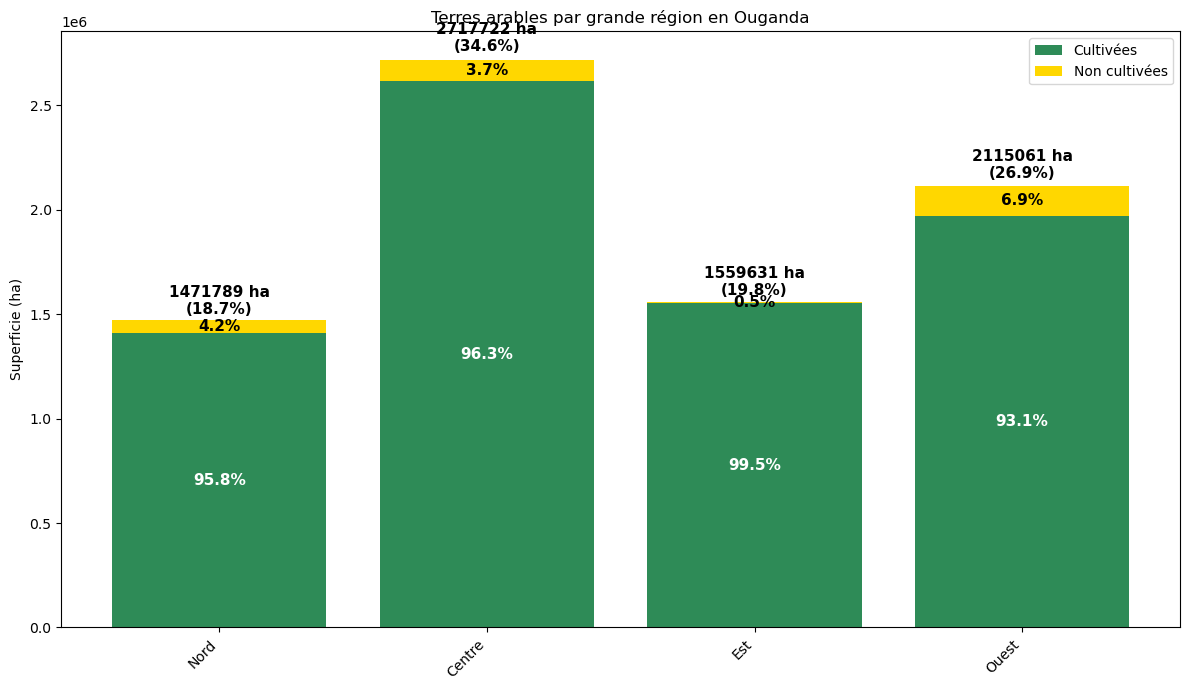

In [13]:
import matplotlib.pyplot as plt

# Calculer la superficie totale pour calculer la part de chaque région
total_superficie = df_regions['Superficie totale (ha)'].sum()
df_regions['% Part région'] = df_regions['Superficie totale (ha)'] / total_superficie * 100

# -----------------------------
# Graphique avec pourcentages + superficie totale + part région
# -----------------------------
fig, ax = plt.subplots(figsize=(12, 7))

# Barres empilées
bars_cult = ax.bar(df_regions['Nom'], df_regions['Cultivées (ha)'], 
                   color='#2E8B57', label='Cultivées')
bars_non_cult = ax.bar(df_regions['Nom'], df_regions['Non cultivées (ha)'], 
                        bottom=df_regions['Cultivées (ha)'], color='#FFD700', label='Non cultivées')

# Ajouter annotations
for i, row in df_regions.iterrows():
    # Pourcentage cultivé au milieu de la barre cultivée
    ax.text(i, row['Cultivées (ha)']/2, f"{row['% Cultivé']:.1f}%", 
            ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    
    # Pourcentage non cultivé au milieu de la barre non cultivée
    ax.text(i, row['Cultivées (ha)'] + row['Non cultivées (ha)']/2, f"{row['% Non cultivé']:.1f}%", 
            ha='center', va='center', color='black', fontsize=11, fontweight='bold')
    
    # Superficie totale + part de la région au sommet
    ax.text(i, row['Superficie totale (ha)']*1.01,  
            f"{row['Superficie totale (ha)']:.0f} ha\n({row['% Part région']:.1f}%)", 
            ha='center', va='bottom', color='black', fontsize=11, fontweight='bold')

# Titres et légende
ax.set_ylabel("Superficie (ha)")
ax.set_title("Terres arables par grande région en Ouganda")
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Sauvegarde du graphique
output_graph_path = "output/terres_arables_4_regions.png"
plt.savefig(output_graph_path, dpi=300)
print(f"Graphique sauvegardé : {output_graph_path}")

plt.show()
